X.shape:  (200, 2)
X[0:5]:
[[ 1.23279618 -0.87955753]
 [ 0.71534387 -0.81363948]
 [-0.22665749 -0.34502504]
 [ 0.03854905  0.2825252 ]
 [ 2.95727406 -0.93363574]]
X[:, 0 ].mean:  0.1009204956966658
X[:, 1 ].mean:  -0.057432994444456285


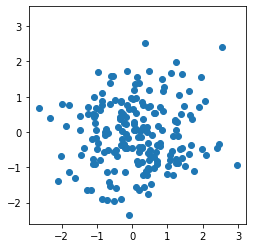

In [12]:
import numpy as np                        # Подключение библиотеки (модуля) NumPy под локальным именем np.
import matplotlib.pyplot as plt           # Подключение модуля pyplot библиотеки matplotlib под локальным именем plt.

randgen = np.random.RandomState(1020304)  # Инициализация генератора псевдослучайных чисел, в скобках -- семя.

# numpy.random.rand(d0, d1, ..., dn):
# create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
# randgen.rand(2, 2) -- массив 2x2 случайных чисел.

# numpy.random.randn(d0, d1, ..., dn):
# return a sample (or samples) from the “standard normal” distribution.

# Матрицы A и B могут быть перемножены, если они совместимы в том смысле, 
# что число столбцов матрицы A равно числу строк B.
# And the result will have the same number of rows as the 1st matrix, 
# and the same number of columns as the 2nd matrix.

# numpy.dot(a, b):
# for 2D vectors, it is the equivalent to matrix multiplication.
# N1xN2, где N1 -- число строк, N2 -- число столбцов .

#X = np.dot(randgen.rand(2, 2), randgen.randn(2, 200)).T    # Генерация матрицы случайных чисел размером 200x2.
X = np.dot([[0.7,-0.7],[0.7,0.7]], randgen.randn(2, 200)).T # Генерация матрицы псевдослучайных чисел размером 200x2.

print("X.shape: ", X.shape)                             # Печать размерности сгенерированной матрицы.
print("X[0:5]:")      
print(X[0:5])                                           # Печать первых 5 строк матрицы.

# scatter(x, y) -- график разброса, 
# X[:, 0] -- столбец №0, X[:, 1] -- столбец №1
 
plt.scatter(X[:, 0], X[:, 1]) # Графический вывод точек, представленных матрицей
plt.axis('square');           # Равный масштаб графика по обеим осям

# Вызывая range() с одним аргументом, вы получите ряд чисел, 
# начинающихся с 0 и включающих каждое число до, 
# но не включая число, которое вы обозначили как конечное (стоп).
# X.shape[1] -- число строк (2 строки).

for i in range(X.shape[1]):                 # Вычисление и печать среднего значения
  print("X[:,",i,"].mean: ",X[:,i].mean())  # данных в столбцах матрицы.

In [13]:
mean_vec = [ X[:,0].mean(), X[:,1].mean() ] # Создание вектора среднего столбцов матрицы X.
print('Mean vector: \n%s\n' %mean_vec)

# (X - mean_vec)                                        -- вычитание вектора 1x2 из массива 200x2 (из каждой строки массива вычитается вектор),
# (X - mean_vec).T                                      -- матрица 2x200,
# (X - mean_vec).T.dot((X - mean_vec))                  -- (матрица 2x200) x (матрица 200x2) = матрица 2x2,
# (X.shape[0]-1)                                        -- 199,
# (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1) -- матрица 2x2, (каждый эл. которой / 199).

cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1) # Вычисление ковариационной матрицы.

# Ковариация sXY = SUM[(xi - xmean)(yi - ymean)] / (N - 1)

print('Covariance matrix: \n%s\n' %cov_mat)                     # Печать ковариационной матрицы.
print('NumPy covariance matrix: \n%s\n' %np.cov(X.T))           # Вычисление и печать ковариационной матрицы в numpy.

# Команда %time является внутренней командой Jupyter Notebook (Built-in magic command), 
# которая позволяет измерить длительность выполнения строки кода.

%time eig_vals, eig_vecs = np.linalg.eig(cov_mat) # Вычисление собственных векторов и значений в numpy.

print('Eigenvectors.shape: ', eig_vecs.shape)     # Печать размерности матрицы собственных векторов.
print('Eigenvectors:\n', eig_vecs)                # Печать матрицы собственных векторов.
print()

print('Eigenvalues.shape: ', eig_vals.shape)      # Печать размерности матрицы собственных значений.
print('Eigenvalues: ', eig_vals)                  # Печать матрицы собственных значений


Mean vector: 
[0.1009204956966658, -0.057432994444456285]

Covariance matrix: 
[[1.00847043 0.05514148]
 [0.05514148 0.85249449]]

NumPy covariance matrix: 
[[1.00847043 0.05514148]
 [0.05514148 0.85249449]]

CPU times: user 198 µs, sys: 30 µs, total: 228 µs
Wall time: 237 µs
Eigenvectors.shape:  (2, 2)
Eigenvectors:
 [[ 0.95302624 -0.30288775]
 [ 0.30288775  0.95302624]]

Eigenvalues.shape:  (2,)
Eigenvalues:  [1.02599531 0.83496961]


components:
 [[ 0.95302624  0.30288775]
 [-0.30288775  0.95302624]]

explained_variance:
 [1.02599531 0.83496961]
explained_variance_ratio_:
 [0.55132437 0.44867563]
pca.mean_:
 [ 0.1009205  -0.05743299]

length:  1.0259953145094207
vector:  [0.95302624 0.30288775]
length:  0.8349696059672671
vector:  [-0.30288775  0.95302624]


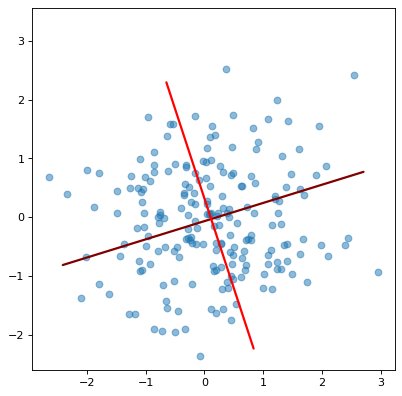

In [14]:
from sklearn.decomposition import PCA   # Подключение модуля из библиотеки sklearn под лок. именем PCA.

pca = PCA(n_components=2)               # Создание объекта для выполнения Principal Component Analysis.
pca.fit(X)                              # Выполнение PCA – вычисление двух главных компонент.

# components_:
# principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.

print("components:\n", pca.components_) # Печать вычисленных компонент.
print()

# В статистике объясненная вариация (explained_variance) измеряет долю, 
# в которой математическая модель учитывает вариацию (дисперсию) данного набора данных. 
# Часто вариация количественно определяется как дисперсия; 
# затем можно использовать более конкретный термин "объясненная дисперсия".
# Величина дисперсии, объясняемая каждым из выбранных компонентов.

# pca.explained_variance_ratio_ – процент дисперсии, объясненный каждым из выбранных компонентов.

print("explained_variance:\n", pca.explained_variance_)               # Печать дисперсии, "объясненной" каждой компонентой.
print("explained_variance_ratio_:\n", pca.explained_variance_ratio_)  # Печать доли "объясненной" дисперсии каждой компоненты.
print("pca.mean_:\n", pca.mean_)                                      # Печать вектора средних значений по столбцам матрицы данных.
print()

# ax.annotate('', v0, v1, arrowprops=arrowprops):
# ' '     -- подпись,
# v0, v1  -- точки, между которыми будет прочерчена линия

def draw_vector(v0, v1, vectorcolor, ax=None):  # Пользовательская функция для рисования векторов
  ax = ax or plt.gca()                          # Get the current axes, creating one if necessary.
  arrowprops=dict(arrowstyle='-', linewidth=2, shrinkA=0, shrinkB=0, color=vectorcolor)
  ax.annotate(' ', v0, v1, arrowprops=arrowprops)

# figure()        -- создание объекта рисунка с графиком:
# figsize=(6, 6)  -- width, height in inches,
# dpi             -- the resolution of the figure in dots-per-inch

currColor=1                               # Цвет отображаемого вектора.
plt.figure(figsize=(6, 6), dpi=80)
# alpha -- значение альфа-смешивания находится в диапазоне от 0 (прозрачный) до 1 (непрозрачный).
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)  # Графическое отображение матрицы исходных данных.

# Функция zip() создаёт итератор, который соединяет элементы из двух и более список. 
# Полученный итератор можно использовать для быстрого 
# и согласованного решения общих задач программирования, таких как создание словарей.

# Цикл по главным компонентам:
for length, vector in zip(pca.explained_variance_, pca.components_): 
  print("length: ", length) # Печать длины вектора главной компоненты.
  print("vector: ", vector) # Печать вектора главной компоненты.
  v = vector * 2.7 * np.sqrt(length)                              # Вычисление длины вектора, пропорциональной объясненной дисперсии.
  draw_vector(pca.mean_ + v, pca.mean_ - v,  (0.5*currColor,0,0)) # Рисование вектора главной компоненты.
  currColor+=1                                                    # Изменение цвета очередного вектора.

plt.axis("square"); # Равный масштаб графика по обеим осям.
# plt.axes().set(xlim=(-4, 4), ylim=(-4, 4))  # Определение границ по осям графика (при необходимости).